# Trabajo práctico 1 



**Human activity recognition**

https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/intro_ia/tree/cohorte-6/clase_2/jupyterbooks/data

**MNIST**

    from sklearn.datasets import fetch_openml
    X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)


Deben maximizarse la cantidad de operaciones vectorizadas en las implementaciones.


## Ejercicio 1 - Implementar clase PCA con numpy
**Dataset** Human activity recognition

Tomar las primeras 63 componentes principales y calcular la varianza contemplada. Realizar las operaciones internas con numpy.linalg. 

Estructura features del dataset: (7352, 561)
Estructura de las etiquetas: (7352,)
[0.07025655 0.04080775 0.05663134 0.44870387 0.50261047 0.41865824
 0.42404382 0.48590857 0.41409363 0.54450954 0.28222384 0.2938471
 0.36356897 0.34358732 0.2977973  0.47177599 0.25958981 0.12632457
 0.22196753 0.37158256 0.37155615 0.38654241 0.46892672 0.43723847
 0.37133739 0.30648628 0.24657635 0.24361798 0.23005132 0.25736571
 0.21498674 0.20882233 0.22141696 0.28606199 0.21627381 0.23620983
 0.23274085 0.36313007 0.33109968 0.38535251 0.51672799 0.37221189
 0.34776883 0.077994   0.09145892 0.10719343 0.07672134 0.09043728
 0.1061409  0.51003806 0.36048244 0.34331439 0.50862149 0.36971156
 0.35001619 0.4009924  0.69785635 0.43700828 0.43591754 0.07332761
 0.08699818 0.10154029 0.36508295 0.28140839 0.39643702 0.2136047
 0.20773088 0.20639244 0.20950039 0.29268831 0.29910982 0.29179758
 0.28339111 0.26989301 0.26026443 0.25340344 0.24909376 0.69658877
 0.70767588 0.70411364 0.18090784 0.16369565 0.15

/home/santiago/Documents/Esp_IA_FIUBA/Intro_IA/Clase_2/venv/lib/python3.8/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


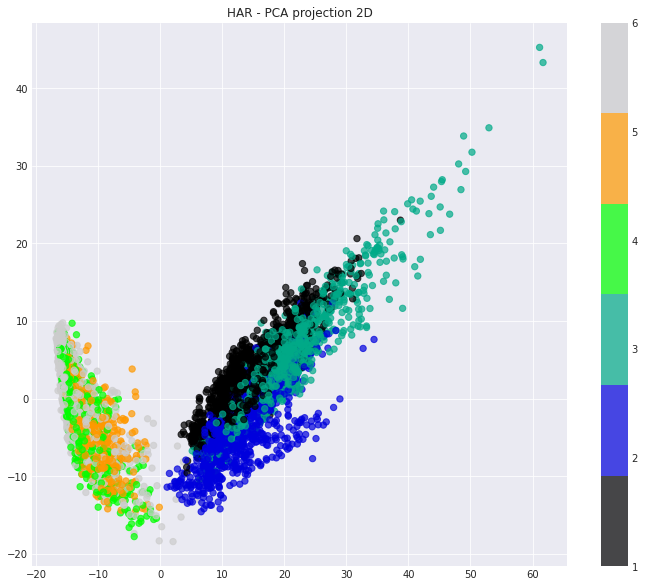

In [42]:
## not implemented
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

PATH_DATASET = "Data/train"
X_train = np.loadtxt("Data/train/X_train.txt")
y_train = np.loadtxt("Data/train/y_train.txt").astype(int)
print("Estructura features del dataset: {}".format(X_train.shape))
print("Estructura de las etiquetas: {}".format(y_train.shape))

Reductor = X_train - np.mean(X_train,axis=0)
D = np.std(Reductor,axis=0)
print(D)
covaria =  np.cov(Reductor.T)
a_val, a_vect = np.linalg.eig(covaria) #eigen valores y vectores
indice = a_val.argsort()[::-1]
a_val = a_val[indice]
a_vect = a_vect[:, indice]


pca = np.dot(Reductor/D,a_vect[:,:63]*-1)
# para sacar el pca y los datos sean lo mas fieles al visto en clase divido sobre el desvio standart
# a la matriz reducida e invierto los autovectores, luego de ordenarlos
pca.shape
#a_val_pca.shape
#muestro segun el plot original
plt.figure(figsize=(12,10))
plt.scatter(pca[:, 0], pca[:, 1], c=y_train, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False #Evita un warning
plt.colorbar()
plt.title('HAR - PCA projection 2D');

## Ejercicio 2 - Implementar clase KMeans con numpy
**Dataset** Human activity recognition

Implementar kmeans con numpy. Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de k=2 y 6. Graficar los casos de k=2 y k=6 con las primeras dos componentes principales.

In [81]:
def k_means_numpy(pca, k, max_iter=100):

    # data_max/data_min : array containing column-wise maximum/minimum values
    data_max = np.max(pca, axis=0)
    data_min = np.min(pca, axis=0)

    n_samples = pca.shape[0]
    n_features = pca.shape[1]

    # labels : array containing labels for data points, randomly initialized
    labels = np.random.randint(low=0, high=k, size=n_samples)
    # centroids : 2D containing centroids for the k-means algorithm
    # randomly initialized s.t. data_min <= centroid < data_max
    centroids = np.random.uniform(low=0., high=1., size=(k, n_features))
    centroids = centroids * (data_max - data_min) + data_min

    # k-means algorithm
    for i in range(max_iter):
        # distances : between datapoints and centroids
        distances = np.array(
            [np.linalg.norm(pca - c, axis=1) for c in centroids])
        # new_labels : computed by finding centroid with minimal distance
        new_labels = np.argmin(distances, axis=0)

        if (labels == new_labels).all():
            # labels unchanged
            labels = new_labels
            print('kmeans listo')
            break
        else:
            # labels changed
            # difference : percentage of changed labels
            difference = np.mean(labels != new_labels)
            #print('%4f%% labels changed' % (difference * 100))
            labels = new_labels
            for c in range(k):
                # computing centroids by taking the mean over associated data points
                centroids[c] = np.mean(pca[labels == c], axis=0)

    return labels

kmeans listo


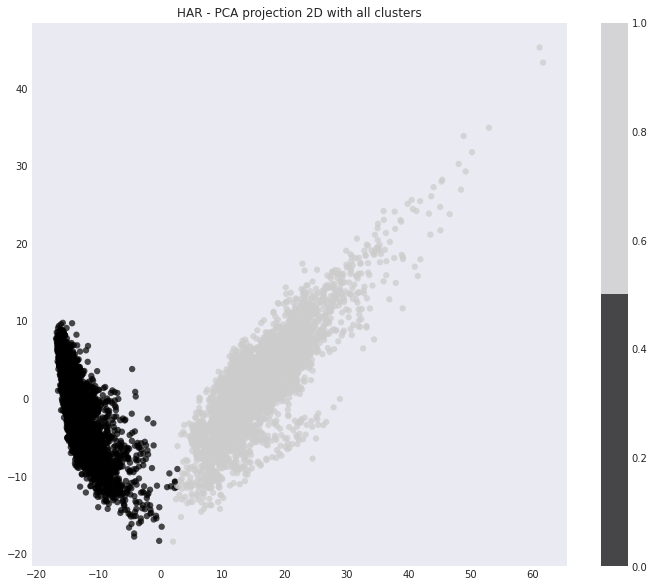

In [82]:
# Graficamos los primeros dos componentes - clusters id
clusters = k_means_numpy(pca, 2, max_iter=100)
plt.figure(figsize=(12,10))
plt.scatter(pca[:, 0], pca[:, 1], c= clusters, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.colorbar()
plt.title('HAR - PCA projection 2D with all clusters');

kmeans listo


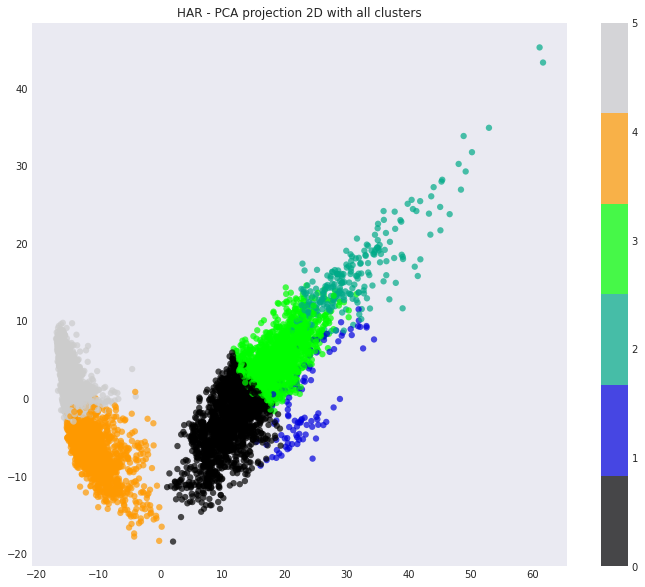

In [83]:
# Graficamos los primeros dos componentes - clusters id
clusters = k_means_numpy(pca, 6, max_iter=100)
plt.figure(figsize=(12,10))
plt.scatter(pca[:, 0], pca[:, 1], c= clusters, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.colorbar()
plt.title('HAR - PCA projection 2D with all clusters');

## Ejercicio 3 - Comparar los ejercicios anteriores con lo visto en las clases

In [ ]:
# not implemented

## Ejercicio 4 - PCA + KMeans

**Dataset**: MNIST

Con las implementaciones de sklearn, tomar las componentes principales que capturen el 90% de la varianza y aplicar kmeans para agrupar los dígitos en 10 clusters. Analizar los resultados. 

In [96]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

import numpy as np
import sklearn

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#import seaborn as sns
#import os
#import gzip
#import sys
import pandas as pd
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import normalize
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [97]:
import tensorflow as tf

(x_train_MNIST, y_train_MNIST), (x_test_MNIST, y_test_MNIST) = tf.keras.datasets.fashion_mnist.load_data()
assert x_train_MNIST.shape == (60000, 28, 28)
assert x_test_MNIST.shape == (10000, 28, 28)
assert y_train_MNIST.shape == (60000,)
assert y_test_MNIST.shape == (10000,)


x_train_MNIST = x_train_MNIST.reshape((60000, 28*28))
x_test_MNIST = x_test_MNIST.reshape((10000, 28*28))

print('Formato de las etiquetas: {}'.format(y_train.shape))

Formato de las etiquetas: (60000,)


In [101]:
# Estandarizamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train_MNIST)
# Aplico PCA con sciKit learn
pca_MNIST = PCA(n_components=0.9, random_state=17).fit(X_scaled)
X_pca_MNIST = pca_MNIST.transform(X_scaled)

In [102]:
kmeans_MNIST = KMeans(n_clusters=10, n_init=100, random_state=17)
kmeans_MNIST.fit(X_pca_MNIST)
cluster_labels = kmeans_MNIST.labels_

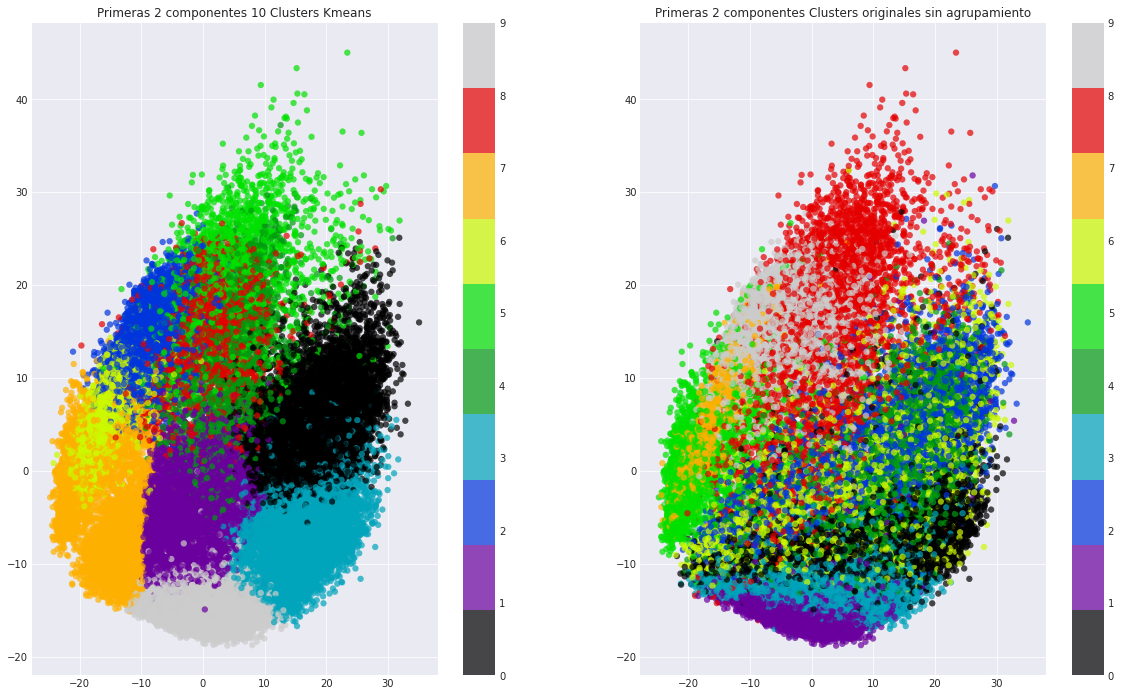

In [113]:
# Graficamos los primeros dos componentes

plt.figure(figsize=(20,12))
# Graficamos los primeros dos componentes contra clusters de kmeans
plt.subplot(1,2,1)
plt.scatter(X_pca_MNIST[:, 0], X_pca_MNIST[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('Primeras 2 componentes 10 Clusters Kmeans');

# Graficamos los primeros dos componentes contra clusters originales
plt.subplot(1,2,2)
plt.scatter(X_pca_MNIST[:, 0], X_pca_MNIST[:, 1], c=y_train_MNIST, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('Primeras 2 componentes Clusters originales sin agrupamiento');